In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\agarcia\OneDrive - ITURRI S.A\AGS\Data Analytics Careerfoundy\11-2022 Instacart Grocery Basket Analysis\02 Data'

In [4]:
# Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. 
# This should be the merged version of your data that contains the new customers column.

In [3]:
ords_prods_cust = pd.read_pickle(os.path.join(path, 'Prepared data', 'ords_prods_customers_4_9a.pkl'))

In [5]:
# Consider any security implications that might exist for this new data. 
# You’ll need to address any PII data in the data before continuing your analysis.

In [6]:
ords_prods_cust.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequent_customer_flag,first_name,surname,Gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# We have the names/surnames and State on the data. This might not fulfill the PII conditions 

In [8]:
# The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. 
# You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [9]:
# Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [10]:

northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [11]:
# list / loop 

result=[]

for value in ords_prods_cust['state']:
    if value in northeast:
        result.append('Northeast')
    elif value in midwest:
        result.append('Midwest')
    elif value in south:
        result.append('South')
    elif value in west:
        result.append('West')

In [12]:
ords_prods_cust['regions']=result

In [13]:
ords_prods_cust.shape

(32404859, 35)

In [14]:
ords_prods_cust.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,Gender,state,age,date_joined,n_dependants,fam_status,income,regions
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [36]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_spo',
       'frequent_customer_flag', 'first_name', 'surname', 'Gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'regions',
       'activity'],
      dtype='object')

In [15]:
# Determine whether there’s a difference in spending habits between the different U.S. regions. 
# (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [17]:
# crosstab
crosstab = pd.crosstab(ords_prods_cust['regions'], ords_prods_cust['spending_flag'], dropna = False)

In [18]:
crosstab

spending_flag,High spender,Low spender
regions,,
Midwest,29994,7567331
Northeast,22747,5699989
South,42800,10749085
West,32301,8260612


In [19]:
# copy to excel
crosstab.to_clipboard()

In [20]:
# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
# Make sure you export this sample.


In [22]:

ords_prods_cust.loc[ords_prods_cust['max_order']>=5,'activity']='normal'
ords_prods_cust.loc[ords_prods_cust['max_order']<5,'activity']='low'

In [23]:
ords_prods_cust['activity'].value_counts()

normal    30964564
low        1440295
Name: activity, dtype: int64

In [24]:
len(ords_prods_cust['activity'])

32404859

In [27]:
# Creating a dataframe containing only low activity customers
df_low=ords_prods_cust[ords_prods_cust['activity']=='low']

In [28]:
# Creating a dataframe containing only normal activity customers
df_normal=ords_prods_cust[ords_prods_cust['activity']=='normal']

In [29]:
df_low.shape

(1440295, 36)

In [30]:
df_normal.shape

(30964564, 36)

In [31]:
1440295 + 30964564

32404859

In [33]:
# export both df
df_low.to_pickle(os.path.join(path,'Prepared Data', 'df_low_4_10.pkl'))


In [34]:
df_normal.to_pickle(os.path.join(path,'Prepared Data', 'df_normal_4_10.pkl'))


In [35]:
# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, 
# curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, 
# and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 
#(Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [37]:
# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [38]:
# remembering values for this columns

In [43]:
column_values_age = ords_prods_cust['age'].unique()

In [44]:
column_values_age

array([31, 69, 62, 71, 38, 41, 64, 66, 49, 60, 30, 67, 54, 51, 50, 76, 24,
       70, 46, 26, 22, 75, 61, 27, 58, 63, 42, 81, 28, 78, 32, 37, 77, 55,
       52, 39, 18, 56, 21, 34, 79, 73, 19, 23, 68, 44, 80, 57, 40, 29, 45,
       20, 53, 25, 33, 65, 36, 59, 43, 74, 47, 72, 35, 48], dtype=int64)

In [45]:
column_values_income = ords_prods_cust['income'].unique()

In [46]:
column_values_income

array([ 40423,  54313, 151988, ...,  85887, 103023,  41766], dtype=int64)

In [47]:
column_values_dpt = ords_prods_cust['department_id'].unique()

In [48]:
column_values_dpt

array([ 7, 16, 19, 17,  4, 14, 13,  3,  1,  9, 15, 11, 12, 20,  6,  5, 21,
        8, 18,  2, 10], dtype=int64)

In [53]:
departments = pd.read_csv(os.path.join(path, 'Original data', 'departments_wrangled.csv'))

In [55]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [56]:
column_values_fam_status = ords_prods_cust['fam_status'].unique()

In [57]:
column_values_fam_status

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

## Age categories

In [59]:
ords_prods_cust.loc[(ords_prods_cust['age']>=18)&(ords_prods_cust['age']<=30),'age_category']='young'
ords_prods_cust.loc[(ords_prods_cust['age']>=30)&(ords_prods_cust['age']<=39),'age_category']='young adult'
ords_prods_cust.loc[(ords_prods_cust['age']>=40)&(ords_prods_cust['age']<=49),'age_category']='mid age'
ords_prods_cust.loc[(ords_prods_cust['age']>=50)&(ords_prods_cust['age']<=59),'age_category']='adult'
ords_prods_cust.loc[ords_prods_cust['age']>60,'age_category']='senior'

## Income categories

In [62]:

minimum = ords_prods_cust['income'].min()
maximum = ords_prods_cust['income'].max()
mean = ords_prods_cust['income'].mean()

# Imprimir los resultados
print(f"Mínimo: {minimum}")
print(f"Máximo: {maximum}")
print(f"Media: {mean}")

Mínimo: 25903
Máximo: 593901
Media: 99437.73329450376


In [63]:
# I will create categories as "below" and "up" to the mean

In [64]:
ords_prods_cust.loc[(ords_prods_cust['income']>=99437),'income_category']='above average'
ords_prods_cust.loc[(ords_prods_cust['income']<99437),'income_category']='below average'

In [65]:
ords_prods_cust['income_category'].value_counts()

below average    17353064
above average    15051795
Name: income_category, dtype: int64

## Values goods categories

#  try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [67]:
# I will combine the age category with n_dependants

In [74]:
ords_prods_cust.loc[(ords_prods_cust['age_category']=="young")&(ords_prods_cust['n_dependants']!=0),'marketing_category']='young parent'
ords_prods_cust.loc[(ords_prods_cust['age_category']=="young")&(ords_prods_cust['n_dependants']==0),'marketing_category']='single young'
ords_prods_cust.loc[(ords_prods_cust['age_category']!="young")&(ords_prods_cust['n_dependants']==0),'marketing_category']='single adult'
ords_prods_cust.loc[(ords_prods_cust['age_category']!="young")&(ords_prods_cust['n_dependants']!=0),'marketing_category']='adult parent'

In [75]:
ords_prods_cust['marketing_category'].value_counts()

adult parent    19730145
single adult     6584273
young parent     4577211
single young     1513230
Name: marketing_category, dtype: int64

## Visualizations

# Key Questions

In [86]:
# The sales team needs to know what the busiest days of the week and hours of the day are 
# (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

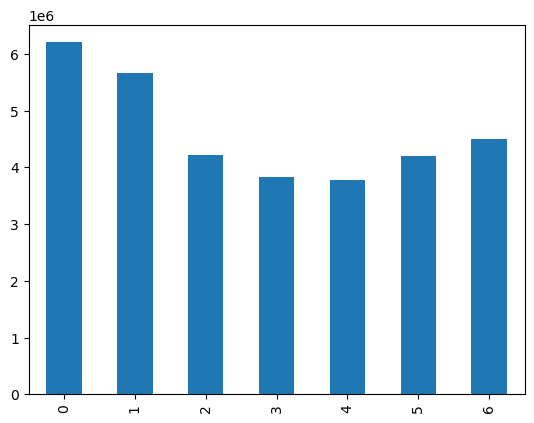

In [81]:
bar_DOW= ords_prods_cust['order_dow'].value_counts().sort_index().plot.bar()

In [82]:
path2 = r'C:\Users\agarcia\OneDrive - ITURRI S.A\AGS\Data Analytics Careerfoundy\11-2022 Instacart Grocery Basket Analysis'

In [85]:
bar_DOW.figure.savefig(os.path.join(path2, '04 Analysis', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

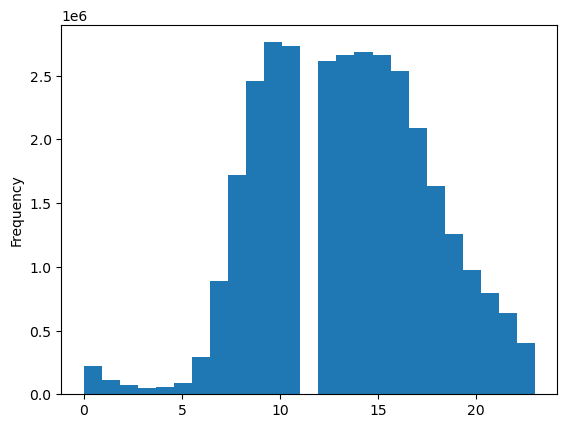

In [87]:
ords_prods_cust['order_hour_of_day'].plot.hist(bins=25)

In [88]:
# They also want to know whether there are particular times of the day when people spend
# the most money, as this might inform the type of products they advertise at these times

In [89]:
# Are there certain types of products that are more popular than others? The marketing
# and sales teams want to know which departments have the highest frequency of product
# orders.

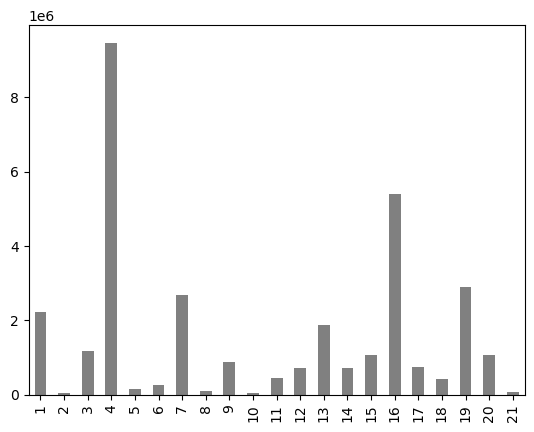

In [91]:
bar_dpt= ords_prods_cust['department_id'].value_counts().sort_index().plot.bar(color=['grey'])

In [94]:
bar_dpt.figure.savefig(os.path.join(path2, '04 Analysis', 'bar_orders_dpt.png'))

In [92]:
# Question about types of customers

In [93]:
#What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
#Are there differences in ordering habits based on a customer’s loyalty status?

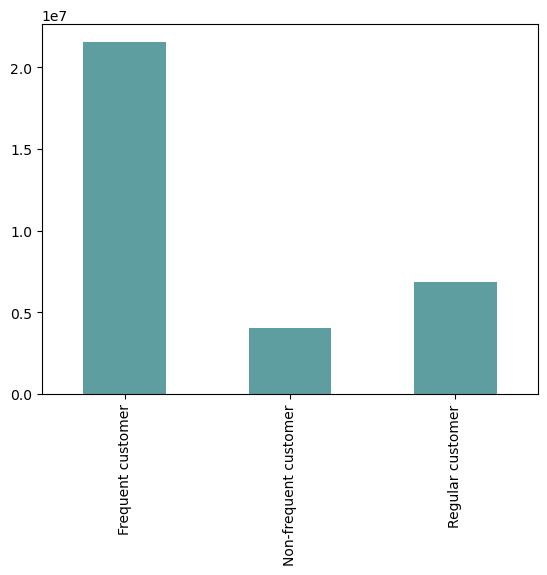

In [96]:
bar_loyalty= ords_prods_cust['frequent_customer_flag'].value_counts().sort_index().plot.bar(color=['#5F9EA0'])

In [97]:
bar_loyalty.figure.savefig(os.path.join(path2, '04 Analysis', 'bar_orders_loyalty.png'))

In [98]:
# Are there differences in ordering habits based on a customer’s region?

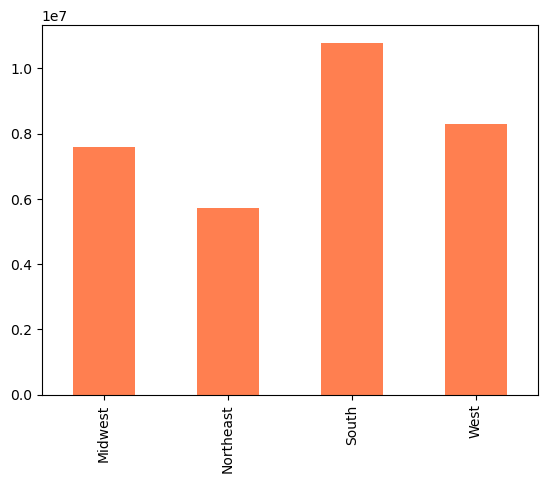

In [99]:
bar_region= ords_prods_cust['regions'].value_counts().sort_index().plot.bar(color=['#FF7F50'])

In [101]:
bar_region.figure.savefig(os.path.join(path2, '04 Analysis', 'bar_orders_regions.png'))

In [102]:
# Is there a connection between age and family status in terms of ordering habits?

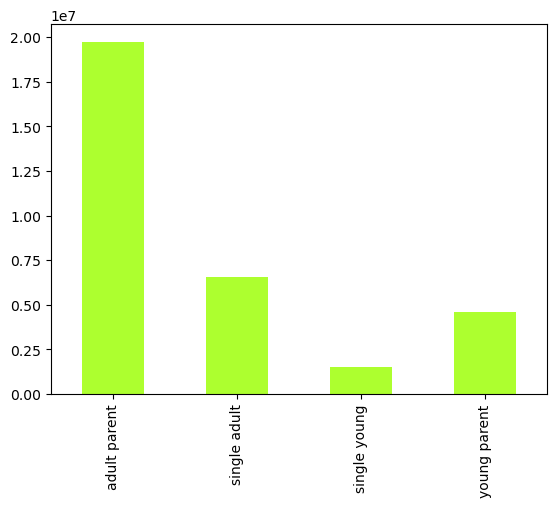

In [103]:
bar_marketing= ords_prods_cust['marketing_category'].value_counts().sort_index().plot.bar(color=['#ADFF2F'])

In [104]:
bar_marketing.figure.savefig(os.path.join(path2, '04 Analysis', 'bar_orders_marketing.png'))

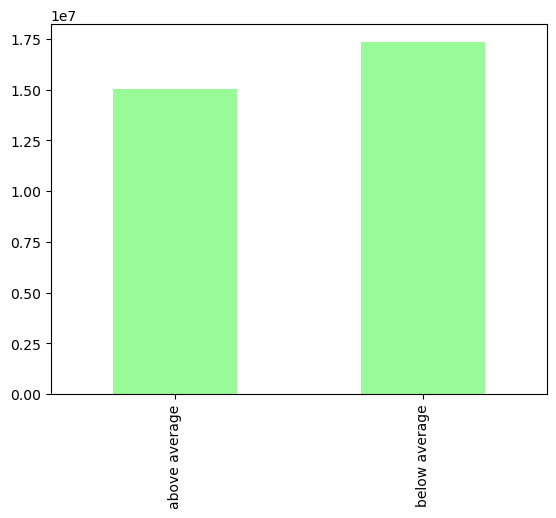

In [105]:
bar_income= ords_prods_cust['income_category'].value_counts().sort_index().plot.bar(color=['#98FB98'])

In [106]:
bar_income.figure.savefig(os.path.join(path2, '04 Analysis', 'bar_orders_income.png'))

<AxesSubplot:xlabel='income', ylabel='age'>

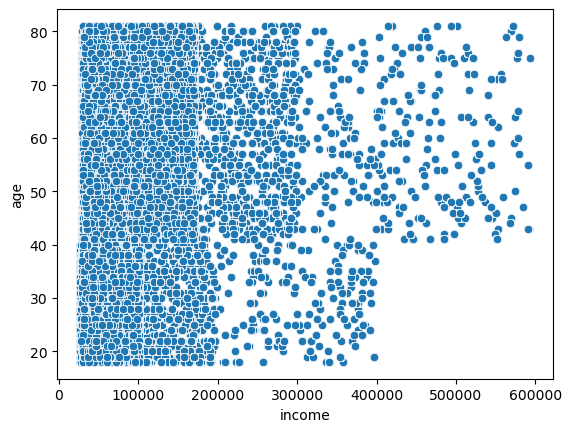

In [108]:
# bringing here the scatterplot by age

sns.scatterplot(x = 'income', y = 'age',data = ords_prods_cust)


## Others queries, visualizations and combinations 

In [109]:
crosstab = pd.crosstab(ords_prods_cust['prices'], ords_prods_cust['product_id'], dropna = False)

In [110]:
crosstab

product_id,1,2,3,4,5,6,7,8,9,10,...,49679,49680,49681,49682,49683,49684,49685,49686,49687,49688
prices,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.1,0,0,0,0,0,0,0,165,0,0,...,0,0,0,0,0,0,0,0,0,0
1.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
grouped_data = ords_prods_cust.groupby('department_id')

In [112]:
aggregated_data = grouped_data.agg({'prices': ['mean', 'max', 'min']})


In [113]:
aggregated_data

prices              
                    mean      max  min
department_id                         
1               7.736553     15.0  1.0
2               6.990934     15.0  1.1
3               7.853809     15.0  1.0
4               7.981708     15.0  1.0
5               8.143701     15.0  1.0
6               7.682264     15.0  1.0
7               7.680502     15.0  1.0
8               7.889070     15.0  1.0
9               7.350283     15.0  1.0
10              8.348960     14.1  1.4
11              7.996769     15.0  1.0
12             16.294443     25.0  8.0
13              8.009443     20.0  1.0
14              8.028963     14.9  1.0
15              7.539976     15.0  1.0
16             33.479533  99999.0  1.0
17              7.384058     15.0  1.0
18              7.638380     15.0  1.0
19              4.275437      7.0  1.6
20              7.778701     15.0  1.0
21              8.660716     15.0  1.0

In [116]:
aggregated_data.to_clipboard

<bound method NDFrame.to_clipboard of                   prices              
                    mean      max  min
department_id                         
1               7.736553     15.0  1.0
2               6.990934     15.0  1.1
3               7.853809     15.0  1.0
4               7.981708     15.0  1.0
5               8.143701     15.0  1.0
6               7.682264     15.0  1.0
7               7.680502     15.0  1.0
8               7.889070     15.0  1.0
9               7.350283     15.0  1.0
10              8.348960     14.1  1.4
11              7.996769     15.0  1.0
12             16.294443     25.0  8.0
13              8.009443     20.0  1.0
14              8.028963     14.9  1.0
15              7.539976     15.0  1.0
16             33.479533  99999.0  1.0
17              7.384058     15.0  1.0
18              7.638380     15.0  1.0
19              4.275437      7.0  1.6
20              7.778701     15.0  1.0
21              8.660716     15.0  1.0>

In [123]:
crosstab_lol_price = pd.crosstab(ords_prods_cust['spending_flag'], ords_prods_cust['loyalty_flag'], dropna = False)

In [124]:
crosstab_lol_price

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High spender,38654,26119,63069
Low spender,10245439,6217871,15813707


In [125]:
crosstab_lol_price.to_clipboard()